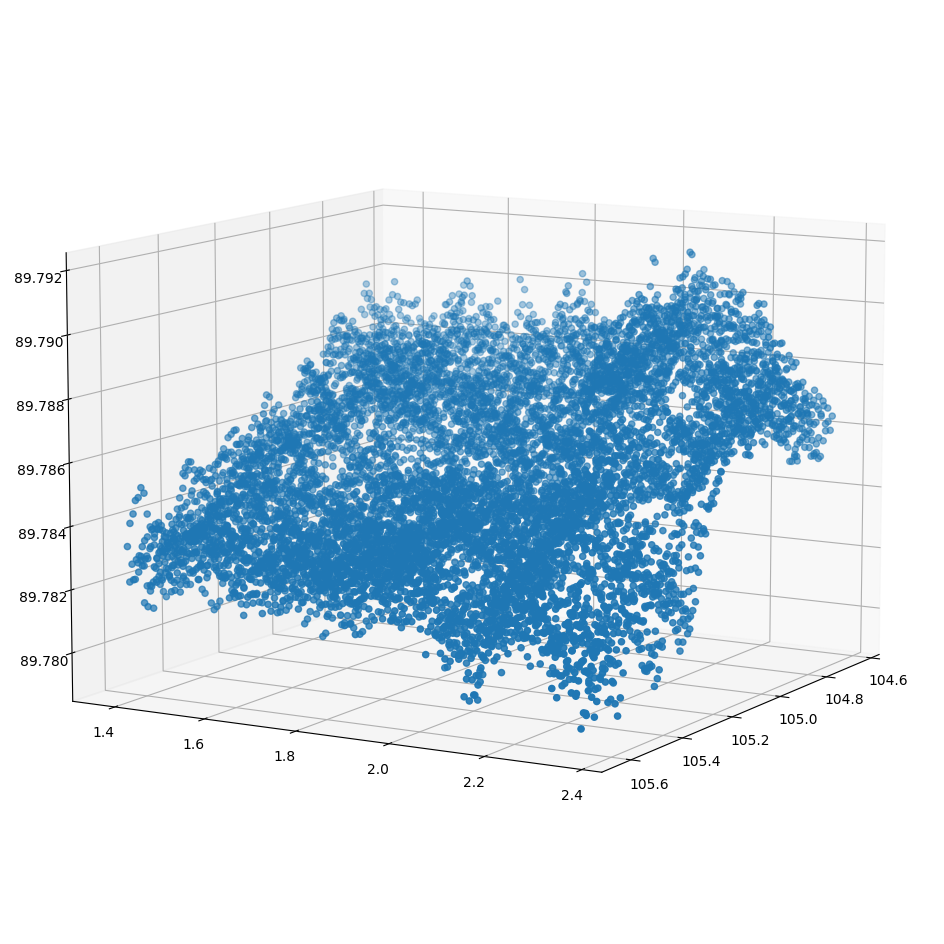

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv
from numpy import matmul

data = np.loadtxt('./data.csv', delimiter=",", encoding='utf-16')
x = data[:,0]
y = data[:,1]
z = data[:,2]
A = np.array([np.ones(len(x)),x,y])
L = z

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(x,y,z)
ax.view_init(10, 30)
plt.show()

Original Array:
[[  1.         1.         1.       ...   1.         1.         1.      ]
 [105.626024 105.616523 105.605873 ... 104.656963 104.646913 104.638762]
 [  1.376686   1.376736   1.376886 ...   2.367798   2.367748   2.367848]]
Transposed Array:
[[  1.       105.626024   1.376686]
 [  1.       105.616523   1.376736]
 [  1.       105.605873   1.376886]
 ...
 [  1.       104.656963   2.367798]
 [  1.       104.646913   2.367748]
 [  1.       104.638762   2.367848]]


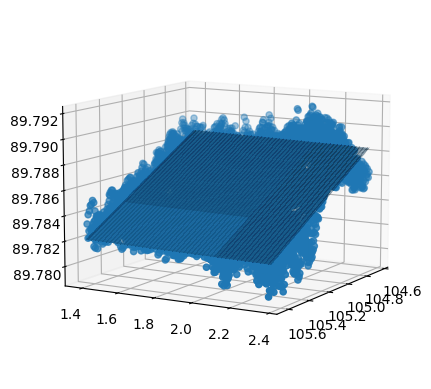

In [6]:
print(f'Original Array:\n{A}')
print(f'Transposed Array:\n{A.transpose()}')
# inv(A'*A)*(A'*L);
result = matmul(inv(matmul(A,A.transpose())),matmul(L,A.transpose()))
b0, b1, b2 = result

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z)
ax.view_init(10, 30)
X, Y = np.meshgrid(x, y)
Z = b0 + b1*X + b2*Y
ax.plot_surface(X, Y, Z, alpha=0.5)
plt.show()

In [5]:
x_min, x_max = np.min(x), np.max(x)
y_min, y_max = np.min(y), np.max(y)
limits = [(x_min, y_min), (x_min, y_max), (x_max, y_min), (x_max, y_max)]
z_limits = [b0 + b1 * dot[0] + b2 * dot[1] for dot in limits]
print("4 Plane limit dots: \n", z_limits)

plane_len = np.sqrt((x_max - x_min)**2 + (y_max - y_min)**2 + (z_limits[0] - z_limits[1])**2)
print("Plane: \n", plane_len)

residual = z-matmul(result,A)
print("Roughness: \n", residual)

4 Plane limit dots: 
 [89.7886114679373, 89.78836415791181, 89.78205989372137, 89.78181258369588]
Plane: 
 1.4082259382667428
Roughness: 
 [ 0.00112711  0.0017729   0.00197319 ... -0.00196525 -0.00234008
 -0.00194944]
